# Seq2Seq

В рамках машинного обучения рассматриваются различные постановки задач анализа данных. Классическое машинное обучение больше ориентировано на решение задачи pattern recognition, распознавания образов в том или ином смысле. То есть смысл состоит в том, что по исходному набору данных мы должны что-то **распознать**, предсказать некоторую характеристику исследуемого объекта, получить на выходе некоторый единичный ответ. В реальности же существует огромное количество задач, не сводящихся к банальному предсказанию некоторой характеристики.

Примером такой задачи является задача машинного перевода. На вход модель получает последовательность токенов на одном языке, а на выходе она должна предсказать последовательность соответствующих токенов на другом языке. Выходные последовательности не кодируются в классы для сведения задачи к задаче классификации: таких классов получилось бы слишком много, да и непонятно как рассмотреть и закодировать всевозможные осмысленные последовательности слов даже заданной длины на некотором языке. То есть модель должна самостоятельно **шаг за шагом** предсказывать новые и новые токены на основе информации о

а) Исходном предложении

б) Уже предсказанных на текущий момент токенах


Модели такого типа, генерирующие одни последовательности на основе других, получили вполне логичное и обоснованное название Sequence2Sequence или Seq2Seq

Другими примерами задач в парадигме Seq2Seq могут служить задачи создания диалоговых систем, автоматической суммаризации текстов.

# Классический подход к задаче

В самом названии Seq2Seq кроется подсказка на тему того, какие модели стали популярными для решения этой задачи. Для работы с последовательными данными очень часто используются рекуррентные нейронные сети и их модификации. Рассмотрим классический вариант применения рекуррентной нейронной сети для решения задачи преобразования последовательности в последовательность.

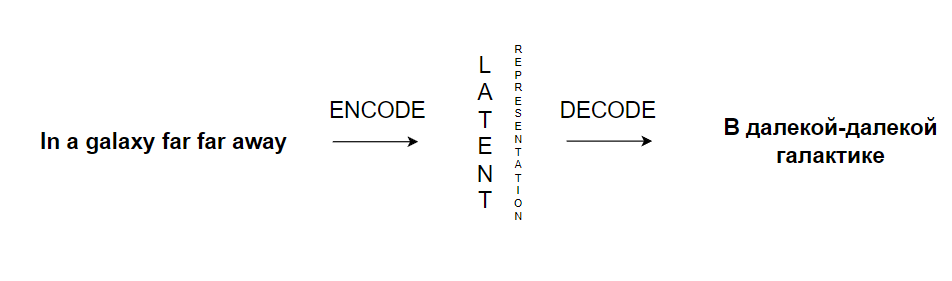

В deep learning существует общая философия представления объектов через набор неинтерпретируемых характеристик, представляющих описание этого объекта в некотором *скрытом, латентном* пространстве.

Для получения этого представления объект необходимо *закодировать*, то есть пропустить его через модель, называемую **энкодером**, а для выхода из этого пространства - необходимо декодировать, то есть пропустить через модель, называемую **декодером**.

Проще говоря, мы предполагаем, что любая фраза на любом языке исчерпывающе описывается своим кодом в латентном пространстве (можно воспринимать его, как пространство смыслов), а затем его можно забрать оттуда и перевести в представление этой фразы на любом другом языке.

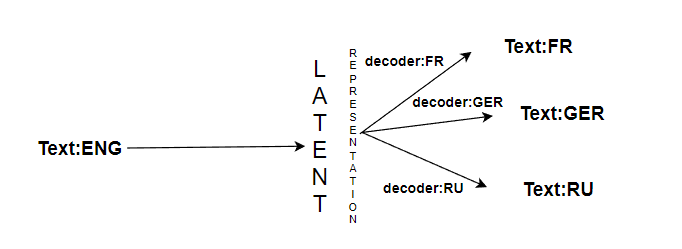

Как несложно догадаться, в качестве энккодера и декодера предлагается использовать рекуррентные нейронные сети

# Encoding

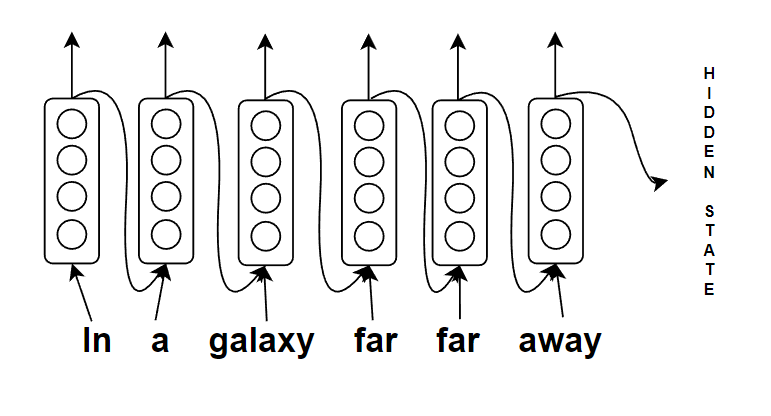

Механизм следующий:
Мы применяем рекуррентный слой шаг за шагом к ккаждому токену в нашем предложении. Согласно общим представлениям о функционировании рекуррентных нейронных сетей, в скрытом состоянии h последовательно накапливается информация о рассмотренных прецедентах, то есть о полученных токенах. На выходе мы получаем hidden state, "впитавший в себя" информацию о всём поданном предложении. Именно этот hidden state может быть использован в качестве латентного представления нашего исходного предложения.

# Decoding

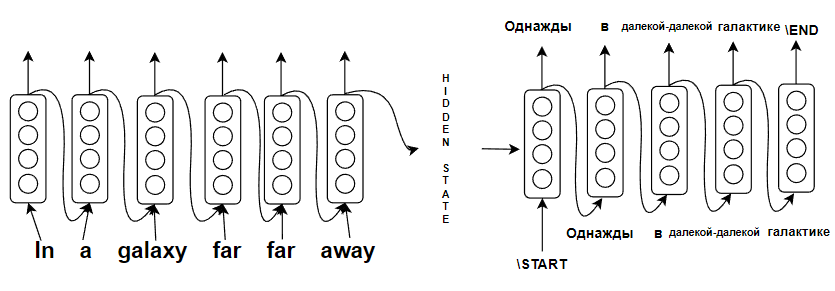

на этапе декодирования мы передаём рекуррентной нейронной сети скрытое состояние, полученное в результате работы энкодера, то есть латентное представление исходной последовательности, таким образом передавая информацию от энкодера к декодеру. На вход модели мы подаём специальный токен \START, показывающий модели, что нужно начинать генерировать выходную последовательность. Генерация последовательности продолжается стандартным меетодом до тех пор, пока модель не вернёт специальный токен \END, означающий конец генерации выходной последовательности.

# Проблемы такого подхода

Кажется довольно нелогичным использование подхода, при котором вклад каждого из слов исходного предложения для генерации каждого из слов выходного предложения обусловлен лишь сформированным на этапе кодирования скрытым состоянием. Моментально возникает уже известная нам проблема затухающего градиента, которая усугубляется при увеличении длины исходной последовательности. Более того, интуитивно кажется более правильным при предсказании последующего слова на эта декодирования каким-то образом учитывать в большей степени слова из исходного предложения, наиболее актуальные для предсказания именно **данного конкретного слова**.

Такие размышления приводят нас к идее механизма внимания.

# Attention

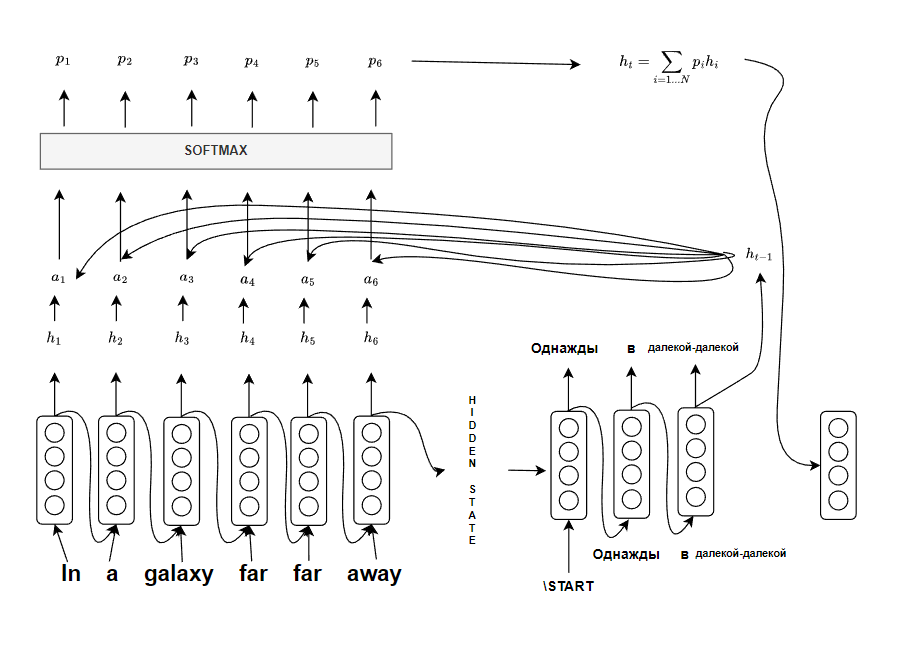

Идея attention состоит в последовательном вычислении т.н. attention scores при предсказании очередного слова на шаге декодирования t. Для каждого шага формируется уникальный hidden state на основе наиболее релевантных $s_i$ с этапа кодирования (в дальнейшем, чтобы не путать h на этапе кодирования и декодирования переобозначим h на этапе кодирования на s). Релевантность определяется при помощи вычисления attention scores для каждой пары ($h_{t-1}$, $s_j$), которые затем при помощи функции softmax преобразуются в веса, с которыми суммируются все $s_i$

То есть
$$h_t = ∑\limits_{i = 1...N}SoftMax(a_i^{(t)})s_i$$

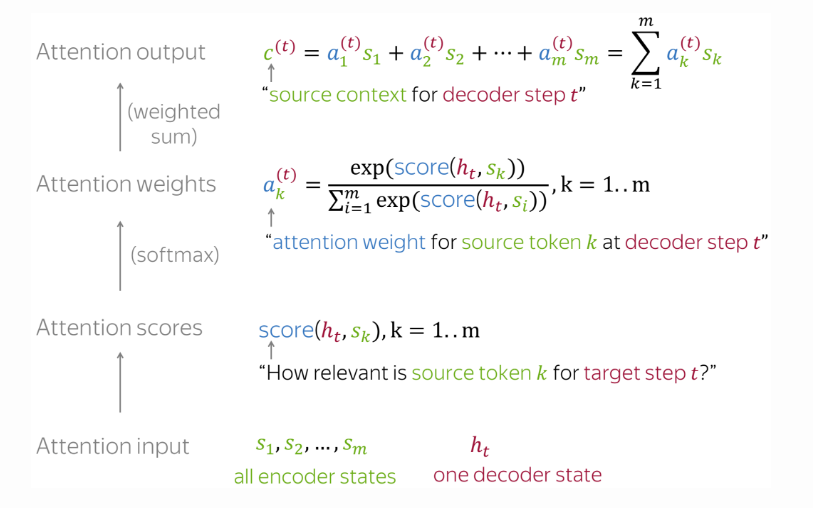

*Изображение из статьи https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html

Интригующим остаётся следующий момент: как посчитать $a_i^{(t)}$?

Есть несколько возможных вариантов. Наиболее популярным является вариант простого скалярного произведения $$a_i^{(t)} = s_i⋅h_{t-1}^T$$

Также довольно часто рассматривают скалярные произведения в других пространствах с заданной матрицей грамма (вычисляют билинейную форму, заданную матрицей W)

$$a_i^{(t)} = s_i⋅W \cdot h_{t-1}^T$$

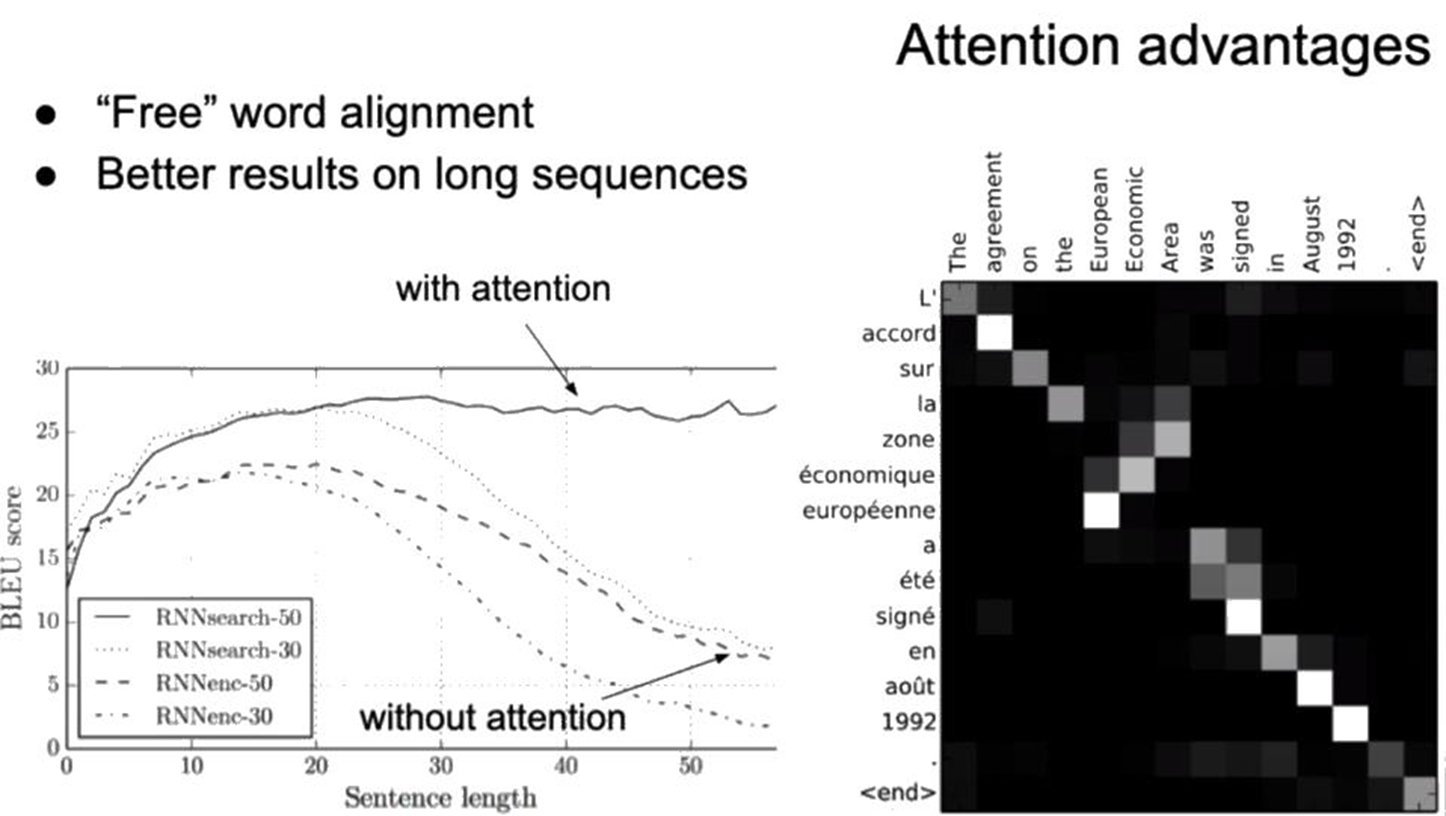

# Метрика BLEU

Bleu - это метрика оценки качества машинного перевода. Она базиреуется на принципе сравнения предложенного перевода с некоторым количеством эталонных переводов и оценки их сходства.

## Униграммная точность

Первая простая, но достаточно разумная (или нет) мысль, которая приходит в голову при попытке оценить качество машинного перевода - это подсчёт униграммной точности. Пусть у нас есть эталонный перевод некоторого предложения, а есть также машинный перевод. Попробуем сравнить их, посчитав долю тех слов в машинном переводе, которые содержатся в эталонном.


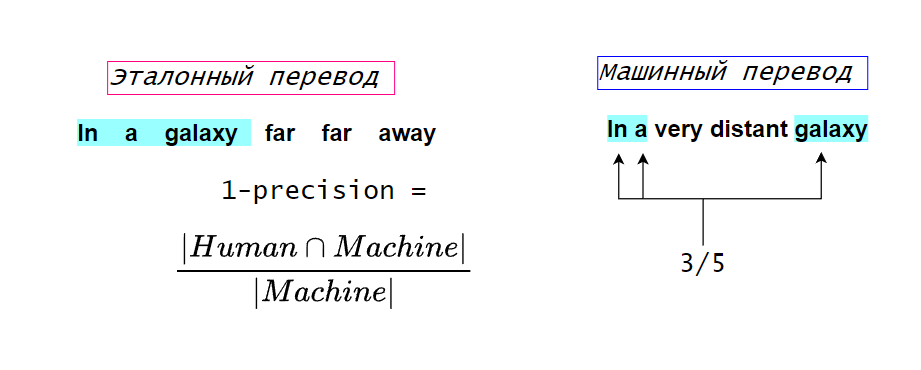

## N-граммная точность
У такого метода есть ряд очевидных недостатков.

Например, что будет, если в наш переводчик поселится Мастер Йода?

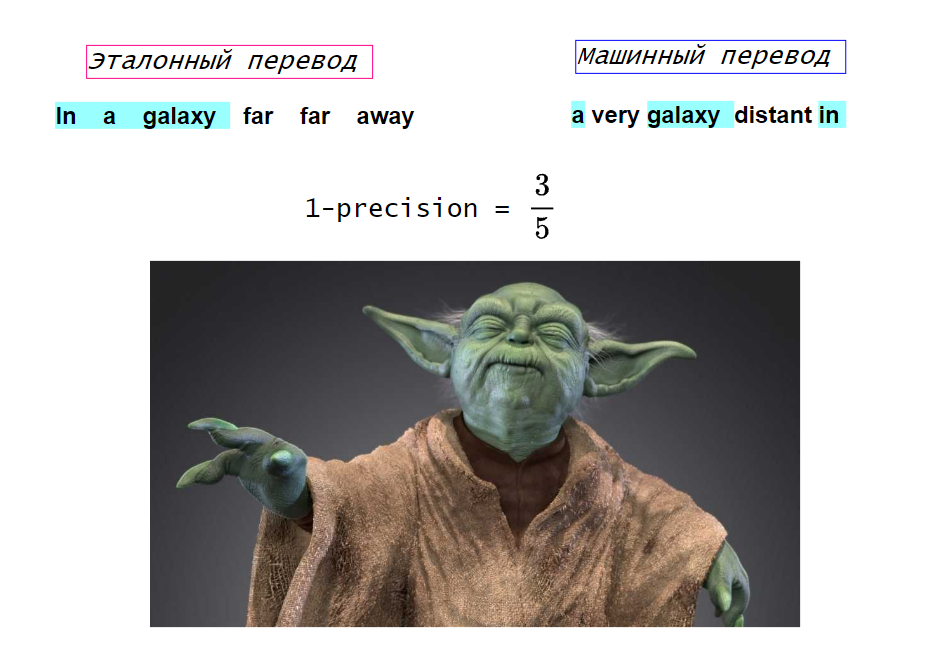

Такая метрика даже не поймёт, что произошло что-то плохое!

В связи с этим мы дополняем униграммную точность биграммной, триграммной и тд (обычно - до 4-го порядка).

$$n-precision = \frac{|Human_n \cap Machine_n|}{|Machine_n|}$$

То есть делаем то же самое, но уже не для отдельных слов, а для n-грамм.

## Урезание частот

Другая проблема состоит в том, что с точки зрения униграммной точности  идеальным будет перевод, состоящий из случайно выбранного подмножества слов эталонного перевода. Например, возможен такой забавный случай

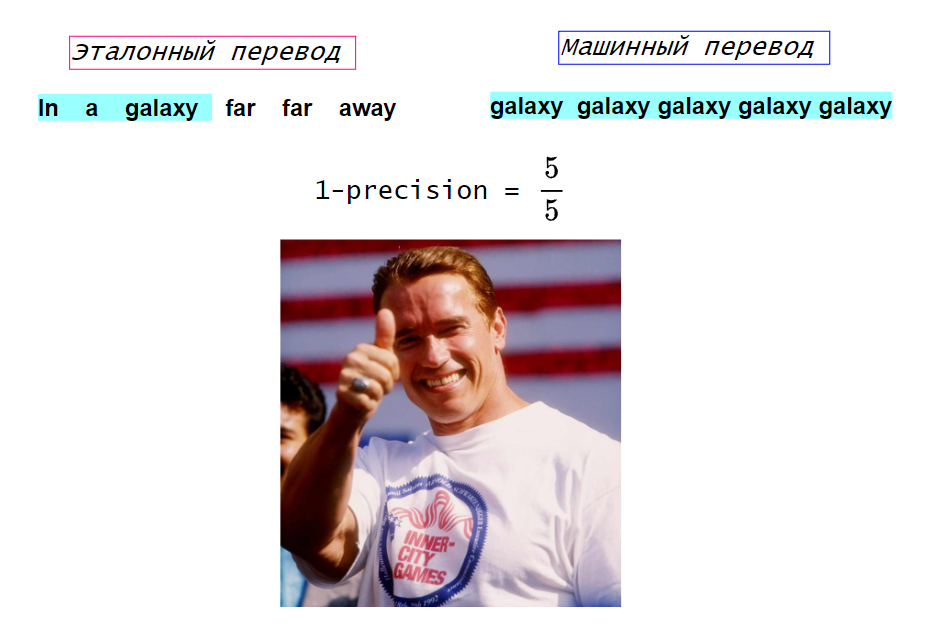

Причем на практике такой случай возникает довольно часто. Сразу возникает мысль о том, что частота каждой уникальной n-граммы в машинном переводе в идеале не должно превышать частоту той же n-граммы в эталонном переводе. Поэтому теперь мы будем учитывать каждую n-грамму при подсчете $n-precision$ максимум столько раз, сколько она встречалась в эталонном.


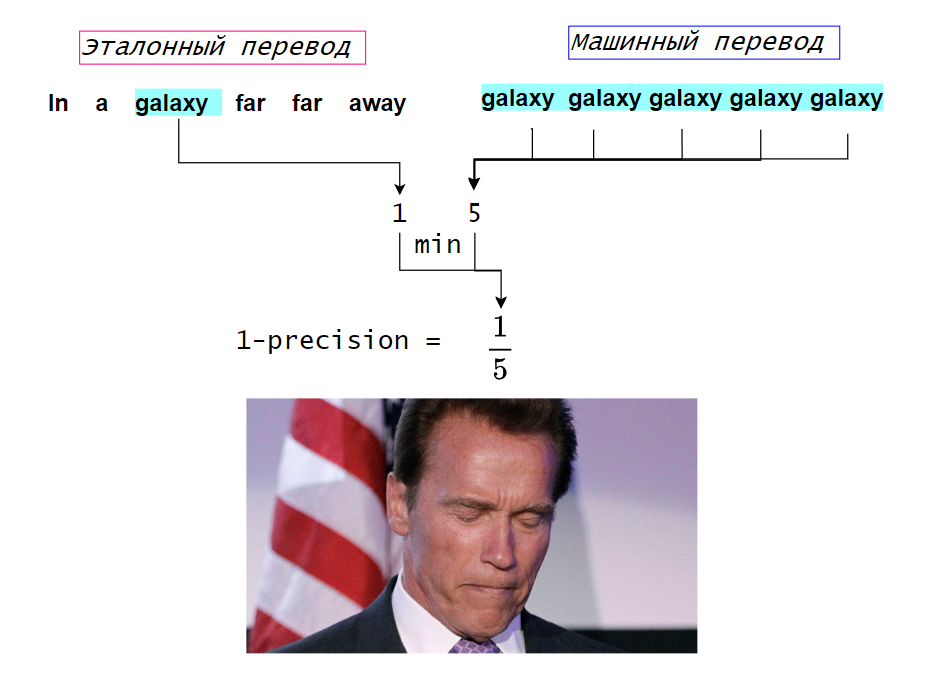

Аналогично мы модифицируем и вычисление n-граммных точностей для произвольных n

Теперь мы определим метрику ${BLEU}_n$, как среднее геометрическое i-граммных точностей по всем i от 1 до n
$$BLEU_n = \sqrt[n]{p_1 ⋅ ... ⋅p_n}$$
Где $p_i = i-precision$ (i-граммная точность)

# Пример

В качестве примера рассмотрим задачу машинного перевода на основе семинара https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

Решается задача машинного перевода. Корпус предложенных текстов - англо-французский. Скачать его можно по ссылке: https://download.pytorch.org/tutorial/data.zip

*Необходимо скачать и разархивировать папку `data.zip`. Разархивированную версию нужно положить в некоторую директорию и указать путь до неё в переменной path в следующей ячейке.

In [ ]:
path = 'drive/MyDrive/SummerSchool_2022/Лекция 9. Seq2Seq, Attention'

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Для работы с предложенным датасетом пропишем специальный класс описания языка `Lang`. Его поля будут содержать статистики описываемого языка, а также словари, индексирующие слова в этом языке.

Пропишем методы `addSentence` и `addWord`, позволяющие обработать и занести в словарь неизвестные ранее слова.

In [ ]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

Ради единообразия и экономии ресурсов приведём тип кодировки unicod к типу ascii.

In [ ]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

Пропишем функцию чтения "языков" из файла

In [ ]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open(path+'/data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

Прочитаем и проведём первичную предобработку фраз

In [ ]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10599 sentence pairs
Counting words...
Counted words:
fra 4345
eng 2803
['vous allez rire .', 'you re going to laugh .']


## Модель

Реализуем типичную модель Seq2Seq на основе рекуррентного энкодера и декодера. Для декодера реализуем также механизм attention.

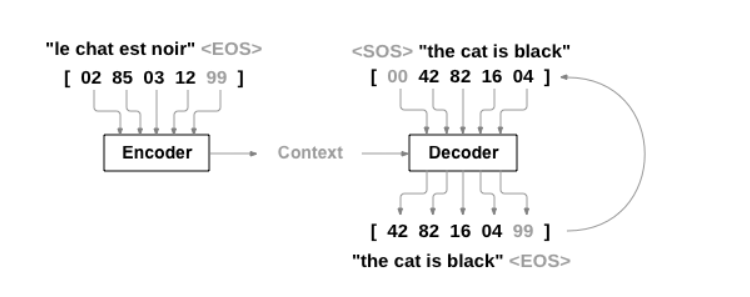

### Encoder

Энкодер построим на основе ячейки Gru (альтернативная, более легковесная, версия LSTM, https://pytorch.org/docs/stable/generated/torch.nn.GRU.html). Для реализации воспользуемся классом `nn.Embedding`, специально предназначенным для получения эмбеддингов слов. К объектам этого класса применимо обращение по индексу. Подробнее об этом классе: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

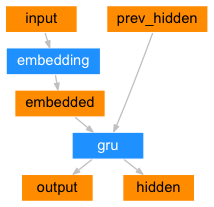

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

## Decoder

Декодер напишем также на основе ячейки gru. Функциональная схема декодера приведена ниже.

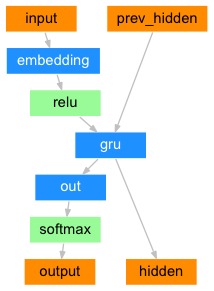

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

Пропишем также механизм attention.

В данном примере он устроен немного иначе, чем мы обсуждали (тоже допустимый вариант). Зададим линейные преобразования `attn` и `attn_combine`. Линейное преобразование `attn` отвечает за генерацию весов attention при помощи функции softmax, которые помещаются в переменную `attention_weights`. Далее, следуя нашему алгоритму, мы рассматриваем произведение `attention_weights` и выходов энкодера, получая переменную `attention_applied`. В качестве выходов модели мы получаем линейное преобразование, примененное к комбинированному вектору, состоящему из `attention_applied` и входам модели, представленным в виде эмбеддингов.

В данном коде используется функция `torch.bmm` (batch matrix-matrix product). Эта функция осуществляет матричное произведение в рамках целого батча (https://pytorch.org/docs/stable/generated/torch.bmm.html).

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

Немного технических функций ....

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

Напишем функцию обучения модели. Причем используем здесь один из рапространённых приёмов обучения рекуррентных нейронных сетей - teacher forcing.

Смысл этой идеи состоит в следующем: при работе декодера мы подаём ему на вход на каждом шаге токены, сгенерированные им же на предыдущем шаге. Этот процесс может приводить к дестабилизации обучения, поскольку ошибка на одном шаге может привести к систематическим ошибкам на следующих шагах. Поэтому иногда бывает разумным немного "поправить" допущенную декодером ошибку, подав на вход на следующем шаге токен правильного слова вместо сгенерированного декодером.

Доля таких "замен" регулируется здесь параметром `teacher_forcing_ratio`.

In [ ]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

Пропишем процесс обучения по итерациям.

In [ ]:
import tqdm

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in tqdm.auto.tqdm(range(1, n_iters + 1)):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

Пропишем промежуточную оценку модели в процессе обучения.

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 75000, print_every=5000)

  0%|          | 0/75000 [00:00<?, ?it/s]

1m 19s (- 18m 30s) (5000 6%) 2.8771
2m 33s (- 16m 35s) (10000 13%) 2.2778
3m 47s (- 15m 11s) (15000 20%) 1.9487
5m 4s (- 13m 58s) (20000 26%) 1.7188
6m 20s (- 12m 40s) (25000 33%) 1.5271
7m 34s (- 11m 22s) (30000 40%) 1.3664
8m 49s (- 10m 5s) (35000 46%) 1.2288
10m 4s (- 8m 49s) (40000 53%) 1.0756
11m 19s (- 7m 32s) (45000 60%) 0.9849
12m 33s (- 6m 16s) (50000 66%) 0.8857
13m 46s (- 5m 0s) (55000 73%) 0.8098
15m 0s (- 3m 45s) (60000 80%) 0.7240
16m 14s (- 2m 29s) (65000 86%) 0.6750
17m 28s (- 1m 14s) (70000 93%) 0.6186
18m 41s (- 0m 0s) (75000 100%) 0.5615


In [ ]:
decoded_words, decoder_attentions = evaluate(encoder1, attn_decoder1, "je suis partie")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
decoded_words

['i', 'm', 'out', 'of', 'control', '.', '<EOS>']